## 전이학습하기 <br>
## 런타임 재실행시마다 할 것

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, cv2
from PIL import Image
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
#path 정리하기
X = np.load('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/X_data_612_new.npy')
y = np.load('/content/drive/MyDrive/2.양추정/np.array_2_이미지수량동일하게/y_data_612.npy')

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (16600, 224, 224, 3)
y shape: (16600,)


In [ ]:
# #지윤 모델 부르기
# food_model = load_model(model_path)
# food_model.summary()

In [4]:
#라벨(1~5) 확인하기
label = np.unique(y)
#원-핫 인코딩
yy = pd.get_dummies(y)

print(label)
print(yy)

[1 2 3 4 5]
           1      2      3      4      5
0       True  False  False  False  False
1       True  False  False  False  False
2       True  False  False  False  False
3       True  False  False  False  False
4       True  False  False  False  False
...      ...    ...    ...    ...    ...
16595  False  False  False  False   True
16596  False  False  False  False   True
16597  False  False  False  False   True
16598  False  False  False  False   True
16599  False  False  False  False   True

[16600 rows x 5 columns]


In [5]:
#X, y 데이터 준비하기
#train 데이터 크기: (13280, 224, 224, 3) (13280, 5)
#test 데이터 크기: (3320, 224, 224, 3) (3320, 5)

X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, stratify=y, random_state=42)

print("train 데이터 크기:", X_train.shape, y_train.shape)
print("test 데이터 크기:", X_test.shape, y_test.shape)

train 데이터 크기: (13280, 224, 224, 3) (13280, 5)
test 데이터 크기: (3320, 224, 224, 3) (3320, 5)




---

## 확인용

In [ ]:
# #food_model design(지윤)
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet152V2
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
# from keras.callbacks import ModelCheckpoint
# from keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam


# # 사전 학습된 ResNet50 모델 로드 (최상위 레이어 제외)
# base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# model = Sequential()
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.2))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(5, activation='softmax'))

# # 일부 층은 훈련되지 않도록 설정 (동결)
# for layer in base_model.layers:
#     layer.trainable = False

# # 모델 컴파일
# model.compile(optimizer='adam', #sgd, Nadam, Adagrad
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()

In [ ]:
input_shape = food_model.layers[0].input_shape
print("Input size:", input_shape)

Input size: (None, 224, 224, 3)


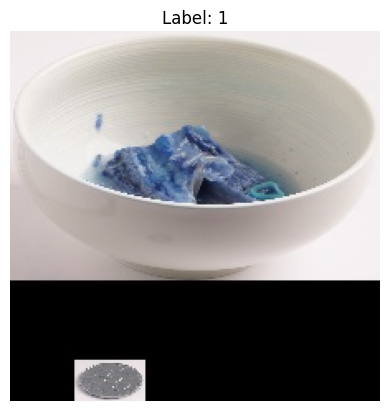

In [ ]:
plt.imshow(X[0])
plt.title('Label: ' + str(y[0]))
plt.axis('off') # 축 제거
plt.show()

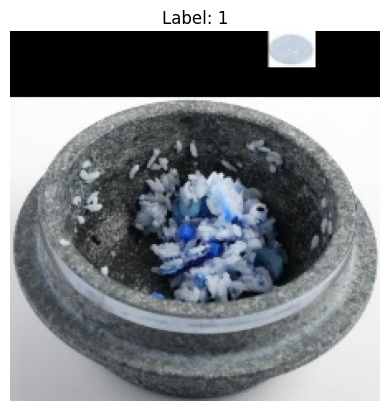

In [ ]:
plt.imshow(X[10000])
plt.title('Label: ' + str(y[0]))
plt.axis('off') # 축 제거
plt.show()

In [ ]:
food_model.layers

In [ ]:
food_model.layers[:-2]

In [ ]:
food_model.layers[-2].output

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dropout_5')>

In [ ]:
food_model.layers[0]

In [ ]:
food_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'resnet152v2_input')>



---
## 모델 학습


In [ ]:
#model7-25

# # 특징 추출 레이어를 포함한 모델 생성
# feature_extractor = Model(inputs=food_model.input, outputs=food_model.layers[0].output)

base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

yang_model = Sequential()
yang_model.add(base_model)
yang_model.add(Dense(32, activation='relu'))
yang_model.add(Dropout(0.25))
yang_model.add(Flatten())
yang_model.add(Dense(5, activation='softmax'))

# 새로운 모델 컴파일
yang_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 새로운 모델 요약
yang_model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-25.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = yang_model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

score = yang_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

234545216/234545216 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 dense (Dense)               (None, 7, 7, 32)          65568     
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 7845      
                                                                 
Total params: 58405061 (222.80 MB)
Trainable params: 58261317 (222.25 MB)
Non-trainable params: 143744 (561.50 KB)
_____

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


238/238 [==============================] - 242s 647ms/step - loss: 1.5797 - accuracy: 0.2638 - val_loss: 1.7828 - val_accuracy: 0.2470
Epoch 2/1000
238/238 [==============================] - ETA: 0s - loss: 1.4069 - accuracy: 0.3581
Epoch 2: val_loss did not improve from 1.78282
238/238 [==============================] - 139s 583ms/step - loss: 1.4069 - accuracy: 0.3581 - val_loss: 4.1597 - val_accuracy: 0.1946
Epoch 3/1000
238/238 [==============================] - ETA: 0s - loss: 1.3155 - accuracy: 0.3989
Epoch 3: val_loss improved from 1.78282 to 1.38510, saving model to /content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-25.h5
238/238 [==============================] - 148s 623ms/step - loss: 1.3155 - accuracy: 0.3989 - val_loss: 1.3851 - val_accuracy: 0.3777
Epoch 4/1000
238/238 [==============================] - ETA: 0s - loss: 1.2470 - accuracy: 0.4329
Epoch 4: val_loss did not improve from 1.38510
238/238 [==============================] - 138s 582ms/step - los

In [ ]:
#model7-26

# # 특징 추출 레이어를 포함한 모델 생성
# feature_extractor = Model(inputs=food_model.input, outputs=food_model.layers[0].output)

base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

yang_model = Sequential()
yang_model.add(base_model)
yang_model.add(GlobalAveragePooling2D())
yang_model.add(Dropout(0.2))
yang_model.add(Dense(32, activation='relu'))
yang_model.add(Dropout(0.2))
yang_model.add(Dense(5, activation='softmax'))

# 새로운 모델 컴파일
yang_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 새로운 모델 요약
yang_model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-26.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = yang_model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

score = yang_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

234545216/234545216 [==============================] - 12s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


238/238 [==============================] - 211s 509ms/step - loss: 1.6155 - accuracy: 0.2126 - val_loss: 1.6095 - val_accuracy: 0.1955
Epoch 2/1000
238/238 [==============================] - ETA: 0s - loss: 1.6096 - accuracy: 0.2001
Epoch 2: val_loss improved from 1.60954 to 1.60945, saving model to /content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-26.h5
238/238 [==============================] - 115s 485ms/step - loss: 1.6096 - accuracy: 0.2001 - val_loss: 1.6095 - val_accuracy: 0.1967
Epoch 3/1000
238/238 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.2005
Epoch 3: val_loss improved from 1.60945 to 1.60896, saving model to /content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-26.h5
238/238 [==============================] - 115s 484ms/step - loss: 1.6095 - accuracy: 0.2005 - val_loss: 1.6090 - val_accuracy: 0.2184
Epoch 4/1000
238/238 [==============================] - ETA: 0s - loss: 1.6079 - accuracy: 0.2075
Epoch 4: val_lo

In [ ]:
#model7-27

# # 특징 추출 레이어를 포함한 모델 생성
# feature_extractor = Model(inputs=food_model.input, outputs=food_model.layers[0].output)

base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

yang_model = Sequential()
yang_model.add(base_model)
yang_model.add(GlobalAveragePooling2D())
yang_model.add(Dropout(0.2))
yang_model.add(Dense(64, activation='relu'))
yang_model.add(Dropout(0.2))
yang_model.add(Dense(5, activation='softmax'))

# 새로운 모델 컴파일
yang_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 새로운 모델 요약
yang_model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-26.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = yang_model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])

score = yang_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

234545216/234545216 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


238/238 [==============================] - 219s 543ms/step - loss: 1.6019 - accuracy: 0.2371 - val_loss: 3.7717 - val_accuracy: 0.2048
Epoch 2/1000
238/238 [==============================] - ETA: 0s - loss: 1.5572 - accuracy: 0.2820
Epoch 2: val_loss improved from 3.77175 to 2.41715, saving model to /content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-26.h5
238/238 [==============================] - 119s 501ms/step - loss: 1.5572 - accuracy: 0.2820 - val_loss: 2.4171 - val_accuracy: 0.2114
Epoch 3/1000
238/238 [==============================] - ETA: 0s - loss: 1.5448 - accuracy: 0.2839
Epoch 3: val_loss did not improve from 2.41715
238/238 [==============================] - 107s 449ms/step - loss: 1.5448 - accuracy: 0.2839 - val_loss: 6.3413 - val_accuracy: 0.2265
Epoch 4/1000
238/238 [==============================] - ETA: 0s - loss: 1.4898 - accuracy: 0.3238
Epoch 4: val_loss improved from 2.41715 to 1.62930, saving model to /content/drive/MyDrive/YANG/model/checkpoin

In [6]:
#model7-28

# # 특징 추출 레이어를 포함한 모델 생성
# feature_extractor = Model(inputs=food_model.input, outputs=food_model.layers[0].output)

base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

yang_model = Sequential()
yang_model.add(base_model)
yang_model.add(GlobalAveragePooling2D())
yang_model.add(Dropout(0.3))
yang_model.add(Dense(128, activation='relu'))
yang_model.add(Dropout(0.2))
yang_model.add(Dense(5, activation='softmax'))

# 새로운 모델 컴파일
yang_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 새로운 모델 요약
yang_model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-28.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = yang_model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=16, verbose=1, callbacks=[checkpoint, early_stopping])

score = yang_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

234545216/234545216 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


623/623 [==============================] - 203s 184ms/step - loss: 1.6217 - accuracy: 0.2058 - val_loss: 3.1733 - val_accuracy: 0.1955
Epoch 2/1000
623/623 [==============================] - ETA: 0s - loss: 1.6086 - accuracy: 0.2044
Epoch 2: val_loss improved from 3.17332 to 2.07873, saving model to /content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-28.h5
623/623 [==============================] - 110s 177ms/step - loss: 1.6086 - accuracy: 0.2044 - val_loss: 2.0787 - val_accuracy: 0.1943
Epoch 3/1000
623/623 [==============================] - ETA: 0s - loss: 1.5989 - accuracy: 0.2327
Epoch 3: val_loss improved from 2.07873 to 1.57680, saving model to /content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-28.h5
623/623 [==============================] - 110s 177ms/step - loss: 1.5989 - accuracy: 0.2327 - val_loss: 1.5768 - val_accuracy: 0.2611
Epoch 4/1000
623/623 [==============================] - ETA: 0s - loss: 1.5704 - accuracy: 0.2655
Epoch 4: val_lo

In [ ]:
#model7-29  (7-1.ipynb 파일로 돌림)

# # 특징 추출 레이어를 포함한 모델 생성
# feature_extractor = Model(inputs=food_model.input, outputs=food_model.layers[0].output)

base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

yang_model = Sequential()
yang_model.add(base_model)
yang_model.add(Dense(64, activation='relu'))
yang_model.add(Dropout(0.25))
yang_model.add(Flatten())
yang_model.add(Dense(5, activation='softmax'))

# 새로운 모델 컴파일
yang_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 새로운 모델 요약
yang_model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-29.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = yang_model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=32, verbose=1, callbacks=[checkpoint, early_stopping])

score = yang_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [6]:
#model7-30

# # 특징 추출 레이어를 포함한 모델 생성
# feature_extractor = Model(inputs=food_model.input, outputs=food_model.layers[0].output)

base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

yang_model = Sequential()
yang_model.add(base_model)
yang_model.add(GlobalAveragePooling2D())
yang_model.add(Dropout(0.2))
yang_model.add(Dense(128, activation='relu'))
yang_model.add(Dropout(0.2))
yang_model.add(Dense(5, activation='softmax'))

# 새로운 모델 컴파일
yang_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 새로운 모델 요약
yang_model.summary()

checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-28.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = yang_model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=50, verbose=1, callbacks=[checkpoint, early_stopping])

score = yang_model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

234545216/234545216 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - 228s 672ms/step - loss: 1.5755 - accuracy: 0.2638 - val_loss: 15.8226 - val_accuracy: 0.2051
Epoch 2/100
200/200 [==============================] - ETA: 0s - loss: 1.4715 - accuracy: 0.3275
Epoch 2: val_loss improved from 15.82262 to 1.53392, saving model to /content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-28.h5
200/200 [==============================] - 119s 595ms/step - loss: 1.4715 - accuracy: 0.3275 - val_loss: 1.5339 - val_accuracy: 0.2834
Epoch 3/100
200/200 [==============================] - ETA: 0s - loss: 1.3759 - accuracy: 0.3822
Epoch 3: val_loss did not improve from 1.53392
200/200 [==============================] - 109s 545ms/step - loss: 1.3759 - accuracy: 0.3822 - val_loss: 6.9919 - val_accuracy: 0.2431
Epoch 4/100
200/200 [==============================] - ETA: 0s - loss: 1.3029 - accuracy: 0.4146
Epoch 4: val_loss did not improve from 1.53392
200/200 [==============================] - 109s 546ms/step - loss



---

## 참조자료

In [ ]:
# #참조사이트 코드를 변형해서
# #초기 모델 정의
# init_model = Sequential([
#     Input(shape=(224, 224, 3)),
#     Conv2D(32, 5, strides=2, activation="relu"),
#     Conv2D(32, 3, activation="relu"),
#     Conv2D(32, 3, activation="relu"),
# ])

# # 특징 추출 레이어들을 가져와서 새로운 모델 생성
# feature_extractor = tf.keras.Model(inputs=init_model.inputs, outputs=[layer.output for layer in init_model.layers])

# # 분류기 모델 정의 (마지막 출력 레이어 제외한 모든 레이어를 동결시킨 후, 새로운 출력 레이어 추가)
# model = Sequential([
#     feature_extractor,  # 특징 추출기로 사용되는 모델을 추가
#     Dense(32, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(5, activation='softmax')  # 양추정을 위한 출력 레이어 (5개의 클래스에 대한 소프트맥스 활성화 함수 사용)
# ])

# # 마지막 출력 레이어를 제외한 모든 레이어 동결
# for layer in model.layers[:-1]:
#     layer.trainable = False

# # 모델 컴파일
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # 모델 요약
# model.summary()

# # 학습 데이터와 레이블 데이터를 제공하여 모델을 학습시킴
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# #지윤 모델 그대로 사용해서 output = 5  실행하는 코드

# food_quantity_model = Sequential()

# # 기존 음식 분류 모델의 기존 레이어들을 가져오기 (resnet152v2까지)
# for layer in food_model.layers[:-2]:
#     food_quantity_model.add(layer)

# food_quantity_model.add(Dense(5, activation='softmax'))

# food_quantity_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# food_quantity_model.summary()

# # y를 one-hot 인코딩하여 사용해야 함
# y_encoded = to_categorical(y, 5)

# food_quantity_model.fit(X, y_encoded, epochs=10, batch_size=32, validation_split=0.2)

In [ ]:
# #지윤 모델 마지막 Dense 음식 분류 10종 삭제 하기 -> why? 나는 추정해야하므로 output이 5분류임
# #참조 사이트: https://hofe-rnd.tistory.com/entry/Keras-%EC%A0%95%EB%A6%AC-3-Sequential-model

# # 음식 분류 모델에서 마지막 레이어 제거
# food_model.pop()

# # 마지막 레이어를 제외한 모든 레이어를 freezing
# for layer in food_model.layers[:-1]:
#     layer.trainable = False

# #양추정 모델 생성
# yang_model = Sequential()
# yang_model.add(food_model)
# yang_model.add(Dense(32, activation='relu'))
# yang_model.add(Dropout(0.25))
# yang_model.add(Flatten())
# yang_model.add(Dense(5, activation='softmax'))  #Dense가 5인 이유: Q1~Q5까지여서

# # 모델 컴파일
# yang_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # 체크포인트 설정
# checkpoint_path = "/content/drive/MyDrive/YANG/model/checkpoint/model_checkpoint_model7-25.h5"
# checkpoint = ModelCheckpoint(checkpoint_path,
#                              monitor='val_loss',
#                              verbose=1,
#                              save_best_only=True,
#                              mode='min')

# # 조기 종료 설정
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

# # 모델 학습
# history = yang_model.fit(X_train, y_train, validation_split=0.25, epochs=1000, batch_size=42, verbose=1, callbacks=[checkpoint, early_stopping])


In [ ]:
#가연 방법

# # MobileNetV3 모델 로드 및 정의
#     base_model = tf.keras.applications.MobileNetV3Small(
#         input_shape=(224, 224, 3),
#         include_top=False,
#         weights='imagenet'
#     )

#     # 모델의 최상위 층 추가
#     model = models.Sequential([
#         base_model,
#         layers.GlobalAveragePooling2D(),
#         layers.Dense(128, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(train_labels.shape[1], activation='softmax')
#     ])

#     # 모델 컴파일
#     model.compile(
#         optimizer=optimizer,
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )

#     # 모델 학습
#     model.fit(
#         train_images, train_labels,
#         validation_data=(test_images, test_labels),
#         epochs=50,
#         callbacks=[early_stopping, reduce_lr]
#     )

#     # 모델 평가
#     loss, accuracy = model.evaluate(test_images, test_labels)
#     print(f"Test accuracy with {optimizer_name}: {accuracy:.4f}\n")